### Imports

In [1]:
import pandas as pd
import numpy as np

### Matplotlib, Seaborn

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# Estilos de Seaborn
sns.set()
sns.set_palette(palette='colorblind')

### Carga de datos

In [3]:
# Columnas a cargar
columnas_cargar = ["date", "device_id", "platform", "ref_type_id", "source_id"]
# Definicion de tipos
tipos = {"device_id" : np.int64,
         "platform" : np.int8,
         "ref_type_id" : np.int8,
         "source_id" : np.int8}
# Carga de datos
auctions = pd.read_csv("../../../data/auctions.csv", usecols=columnas_cargar, dtype=tipos, parse_dates=["date"])

# Preguntas 

# ¿Cuáles son los 10 dispositivos que más aparecieron en subastas?

In [20]:
top_10_dispositivos = auctions.groupby("device_id").agg({"platform" : "count"}).rename(columns = {"platform" : "apariciones"}).nlargest(10, "apariciones")

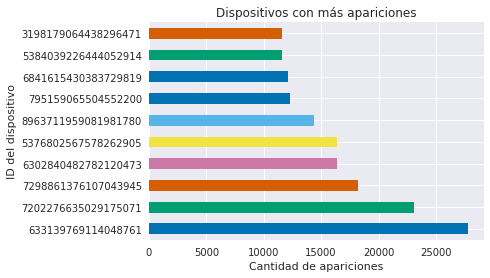

In [31]:
plt.figure(figsize=(6, 4))
top_10_dispositivos["apariciones"].plot(kind="barh")
plt.title("Dispositivos con más apariciones")
plt.xlabel("Cantidad de apariciones")
plt.ylabel("ID del dispositivo");

# ¿Cuántos dispositivos diferentes aparecieron en subastas?

In [35]:
len(auctions["device_id"].value_counts())

206977

# ¿Cómo se distribuye la cantidad de apariciones en subastas por dispositivo?

In [36]:
apariciones = auctions.groupby("device_id").agg({"platform" : "count"}).rename(columns={"platform" : "apariciones"})

/opt/anaconda/3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


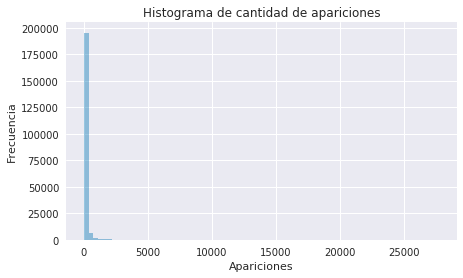

In [93]:
plt.figure(figsize=(7, 4))
sns.distplot(apariciones["apariciones"], bins=75, kde=False)
plt.title("Histograma de cantidad de apariciones")
plt.xlabel("Apariciones")
plt.ylabel("Frecuencia");

# ¿Cómo se distribuye la cantidad de subastas según el día?

In [124]:
# Filtro desde miércoles hasta martes, para no sumar datos de dos días. Me interesa la semana desde el miércoles inclusive hasta el martes inclusive.
filtro = (auctions["date"].dt.day > 5) & (auctions["date"].dt.day < 13)
subastas_por_dia = auctions.loc[filtro] \
                           .groupby(auctions["date"].dt.dayofweek) \
                           .agg({"device_id" : "count"}) \
                           .rename(columns={"device_id" : "cantidad de subastas"})


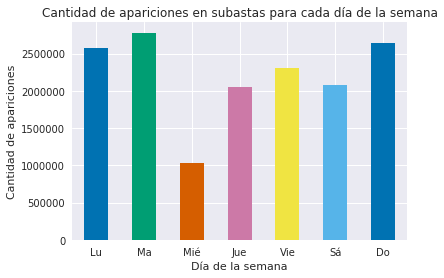

In [125]:
plt.figure(figsize=(6, 4))
subastas_por_dia["cantidad de subastas"].plot(kind="bar")
plt.title("Cantidad de apariciones en subastas para cada día de la semana")
plt.ylabel("Cantidad de apariciones")
plt.xlabel("Día de la semana")
plt.xticks(np.arange(7),["Lu", "Ma", "Mié", "Jue", "Vie", "Sá", "Do"], rotation="horizontal");

# ¿Varía la cantidad de subastas entre el Martes 5/3 y el Martes 12/3?

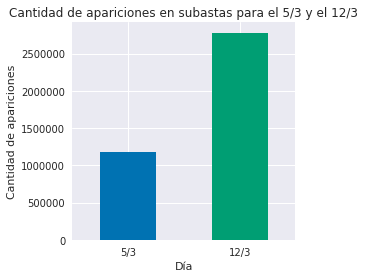

In [135]:
martes_5 = auctions["date"].dt.day == 5
martes_12 = auctions["date"].dt.day == 12
martes = auctions.loc[martes_5 | martes_12].groupby(auctions["date"].dt.day).agg({"device_id" : "count"}).rename(columns={"device_id" : "cantidad de subastas"})
plt.figure(figsize=(4, 4))
martes["cantidad de subastas"].plot(kind="bar")
plt.title("Cantidad de apariciones en subastas para el 5/3 y el 12/3")
plt.ylabel("Cantidad de apariciones")
plt.xlabel("Día")
plt.xticks(np.arange(2),["5/3", "12/3"], rotation="horizontal");

# ¿Varía la cantidad de subastas entre el Miércoles 6/3 13/3?

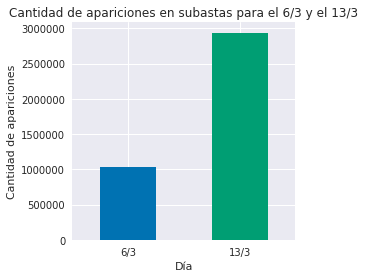

In [136]:
miercoles_6 = auctions["date"].dt.day == 6
miercoles_13 = auctions["date"].dt.day == 13
martes = auctions.loc[miercoles_6 | miercoles_13].groupby(auctions["date"].dt.day).agg({"device_id" : "count"}).rename(columns={"device_id" : "cantidad de subastas"})
plt.figure(figsize=(4, 4))
martes["cantidad de subastas"].plot(kind="bar")
plt.title("Cantidad de apariciones en subastas para el 6/3 y el 13/3")
plt.ylabel("Cantidad de apariciones")
plt.xlabel("Día")
plt.xticks(np.arange(2),["6/3", "13/3"], rotation="horizontal");

# ¿Cómo se distribuye la cantidad de subastas según el día?

In [149]:
subastas_por_dia_todos = auctions.groupby(auctions["date"].dt.day) \
                           .agg({"device_id" : "count"}) \
                           .rename(columns={"device_id" : "cantidad de subastas"})

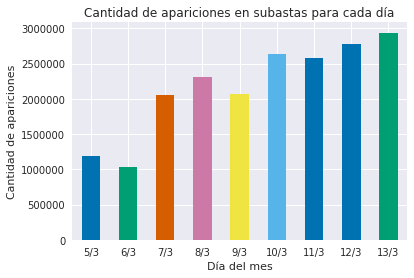

In [151]:
plt.figure(figsize=(6, 4))
subastas_por_dia_todos["cantidad de subastas"].plot(kind="bar")
plt.title("Cantidad de apariciones en subastas para cada día")
plt.ylabel("Cantidad de apariciones")
plt.xlabel("Día del mes")
plt.xticks(np.arange(9),["{}/3".format(x) for x in range(5,14)], rotation="horizontal");

# ¿Cómo se distribuye la cantidad de subastas según el horario?

In [111]:
subastas_por_hora = auctions.groupby(auctions["date"].dt.hour).agg({"device_id" : "count"}).rename(columns={"device_id" : "cantidad de subastas"})

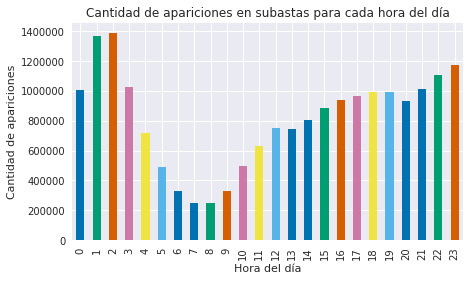

In [114]:
plt.figure(figsize=(7, 4))
subastas_por_hora["cantidad de subastas"].plot(kind="bar")
plt.title("Cantidad de apariciones en subastas para cada hora del día")
plt.ylabel("Cantidad de apariciones")
plt.xlabel("Hora del día");

In [117]:
auctions["date"].dt.day.value_counts()

13    2938373
12    2779910
10    2637534
11    2574916
8     2303002
9     2074552
7     2047661
5     1182401
6     1032970
Name: date, dtype: int64